In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
num_states=600
min_val=-200
max_val=400
num_actions=600
m=100
T=50

In [8]:
import random
import numpy as np

# Parameters
p = 2       # Procurement cost per unit
a_cost = 1  # Holding cost coefficient
b_cost = 5  # Backlog cost coefficient

def inventory_cost(s_next, a):
    """
    Returns the cost for taking action a and ending up in state s_next.
    cost = p*a + holding/backlog
    """
    if s_next >= 0:
        return p*a + a_cost*s_next
    else:
        return p*a + b_cost*(-s_next)

random.seed(42)  # for reproducible random numbers

num_samples = 1000
s = 5  # initial state
samples = []

# for _ in range(num_samples):
#     a = random.randint(0, 10)   # choose action
#     w = random.randint(0, 10)   # demand
#     s_next = s + a - w
#     c = inventory_cost(s_next, a)
#     samples.append((s, a, c, s_next))
#     s = s_next  # move to next state

# # Print all 1000 samples
# for i, sample in enumerate(samples, start=1):
#     print(f"{i}. (s={sample[0]}, a={sample[1]}, cost={sample[2]}, s_next={sample[3]})")

s = random.randint(0, 10)

j = np.zeros((num_states, num_actions))
g = np.zeros((num_states, num_actions, T))
for l in range(num_states):
    for k in range(num_actions):
        w = random.randint(0, 10)
        j[l][k] = l + k - w
        for t in range(T):
            g[l][k][t] = inventory_cost(j[l][k], k)

print("rewards are: ", g)


rewards are:  [[[   5.    5.    5. ...    5.    5.    5.]
  [   3.    3.    3. ...    3.    3.    3.]
  [  14.   14.   14. ...   14.   14.   14.]
  ...
  [1784. 1784. 1784. ... 1784. 1784. 1784.]
  [1794. 1794. 1794. ... 1794. 1794. 1794.]
  [1789. 1789. 1789. ... 1789. 1789. 1789.]]

 [[  10.   10.   10. ...   10.   10.   10.]
  [   3.    3.    3. ...    3.    3.    3.]
  [  24.   24.   24. ...   24.   24.   24.]
  ...
  [1790. 1790. 1790. ... 1790. 1790. 1790.]
  [1793. 1793. 1793. ... 1793. 1793. 1793.]
  [1797. 1797. 1797. ... 1797. 1797. 1797.]]

 [[  35.   35.   35. ...   35.   35.   35.]
  [  17.   17.   17. ...   17.   17.   17.]
  [  29.   29.   29. ...   29.   29.   29.]
  ...
  [1787. 1787. 1787. ... 1787. 1787. 1787.]
  [1794. 1794. 1794. ... 1794. 1794. 1794.]
  [1790. 1790. 1790. ... 1790. 1790. 1790.]]

 ...

 [[ 589.  589.  589. ...  589.  589.  589.]
  [ 594.  594.  594. ...  594.  594.  594.]
  [ 599.  599.  599. ...  599.  599.  599.]
  ...
  [2382. 2382. 2382. ... 2

In [9]:
Q=np.zeros((num_states,num_actions,m,T))


In [10]:
import random
import numpy as np

# Parameters
p = 2       # Procurement cost per unit
a_cost = 1  # Holding cost coefficient
b_cost = 5  # Backlog cost coefficient

def inventory_cost(s_next, a):
    """
    Returns the cost for taking action a and ending up in state s_next.
    cost = p*a + holding/backlog cost
    """
    s_next = s_next - 200
    if s_next >= 0:
        return p * a + a_cost * s_next
    else:
        return p * a + b_cost * (-s_next)

random.seed(42)  # for reproducible random numbers

# Sample simulation code (currently commented out)
num_samples = 1000
s = 5  # initial state
samples = []

# for _ in range(num_samples):
#     a = random.randint(0, 10)   # choose action
#     w = random.randint(0, 10)   # demand
#     s_next = s + a - w
#     c = inventory_cost(s_next, a)
#     samples.append((s, a, c, s_next))
#     s = s_next  # move to next state
#
# for i, sample in enumerate(samples, start=1):
#     print(f"{i}. (s={sample[0]}, a={sample[1]}, cost={sample[2]}, s_next={sample[3]})")

# Choose a new state randomly (unused later in this snippet)


# Define additional parameters
num_states = 700  # e.g., states 0 to 10
num_actions = 20     # e.g., actions 0 to 10
T = 40               # time horizon (costs defined for t=0,...,T-1)
m = 100              # number of iterations for Q-value update
min_val = -200          # starting index for states
max_val = 500 # ending index for states (exclusive)

# Initialize arrays
# j: next state for each state-action pair
# g: immediate cost for each state, action, and time (for t=0,...,T-1)
j = np.zeros((num_states, num_actions), dtype=int)
g = np.zeros((num_states, num_actions, T))

# Q: Q-values with dimensions (state, action, iteration, time)
# We allocate T+1 for time to allow for terminal cost assignment.
Q = np.zeros((num_states, num_actions, m+1, T+1))

# Compute next states and immediate cost (g)
for l in range(num_states):
    for k in range(num_actions):
        w = random.randint(0, 10)
        next_state = l + k - w
        j[l][k] = max(0, min(next_state, num_states - 1))
        for t in range(T):
            g[l][k][t] = inventory_cost(j[l][k], k)

print("Immediate cost (g) for each state, action, and time step:")
print(g)

# Q-value update (example update rule)
# We update Q using a learning rate alpha_m; note that
# we only update for t=0 to T-1 so that t+1 is valid.
for idx in range(m):
    alpha_m = 10 / (m + 1)  # example learning rate
    for i in range(min_val, max_val):
        for a in range(num_actions):
            for t in range(T - 1):  # update for t=0,...,T-2
                Q[i, a, idx+1, t] = ((1 - alpha_m) * Q[i, a, idx, t] +
                                     alpha_m * (g[i, a, t] + np.min(Q[max(0, min(j[i, a], num_states - 1)), :, idx, t+1])))
            # For the terminal time step, assign terminal cost using the last immediate cost value
            Q[i, a, idx+1, T] = g[i, a, T-1]

print("Updated Q-values:")
print(Q)


Immediate cost (g) for each state, action, and time step:
[[[1000. 1000. 1000. ... 1000. 1000. 1000.]
  [1002. 1002. 1002. ... 1002. 1002. 1002.]
  [ 994.  994.  994. ...  994.  994.  994.]
  ...
  [ 964.  964.  964. ...  964.  964.  964.]
  [ 986.  986.  986. ...  986.  986.  986.]
  [ 988.  988.  988. ...  988.  988.  988.]]

 [[ 995.  995.  995. ...  995.  995.  995.]
  [1002. 1002. 1002. ... 1002. 1002. 1002.]
  [1004. 1004. 1004. ... 1004. 1004. 1004.]
  ...
  [ 969.  969.  969. ...  969.  969.  969.]
  [ 946.  946.  946. ...  946.  946.  946.]
  [ 943.  943.  943. ...  943.  943.  943.]]

 [[1000. 1000. 1000. ... 1000. 1000. 1000.]
  [ 992.  992.  992. ...  992.  992.  992.]
  [1004. 1004. 1004. ... 1004. 1004. 1004.]
  ...
  [ 984.  984.  984. ...  984.  984.  984.]
  [ 951.  951.  951. ...  951.  951.  951.]
  [ 938.  938.  938. ...  938.  938.  938.]]

 ...

 [[ 487.  487.  487. ...  487.  487.  487.]
  [ 493.  493.  493. ...  493.  493.  493.]
  [ 502.  502.  502. ...  502.  

[[ 999.97035156 1001.97029226  993.97052945 ...  963.9714189
   985.97076664  987.97070734]
 [ 994.9704998  1001.97029226 1003.97023297 ...  968.97127066
   945.97195258  942.97204152]
 [ 999.97035156  991.97058875 1003.97023297 ...  983.97082593
   950.97180433  937.97218976]
 ...
 [ 486.98556121  492.98538332  501.98511648 ...  532.98419738
   534.98413808  536.98407879]
 [ 490.98544262  500.98514613  500.98514613 ...  532.98419738
   534.98413808  536.98407879]
 [ 495.98529437  500.98514613  499.98517578 ...  532.98419738
   534.98413808  536.98407879]]


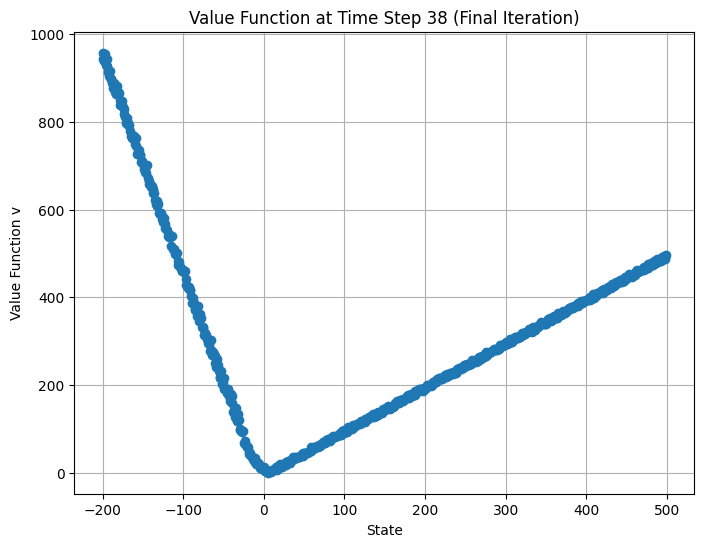

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assume Q, m, and num_states are defined from your previous code.

# Set the time step to plot the value function
time_step = 38

final_iteration = m  # using the final iteration for the value function

# Compute the value function v for each state as the minimum Q-value over actions at the chosen time step
v = np.min(Q[:, :, final_iteration, time_step], axis=1)
print(Q[:, :, final_iteration, time_step])

# Create a plot of the value function vs. state
plt.figure(figsize=(8, 6))
plt.plot(np.arange(min_val, max_val), v, marker='o', linestyle='-')
plt.xlabel('State')
plt.ylabel('Value Function v')
plt.title(f'Value Function at Time Step {time_step} (Final Iteration)')
plt.grid(True)
plt.show()


In [12]:
# def compute_base_stock_levels(V, time_steps, min_inventory, max_inventory, 
#                               demand_values, demand_prob, holding_cost, discount, price, s=0):
#     """
#     Computes a single base-stock level sigma_t for each time step t for a given pre-decision state s.
#     We solve:
#       sigma_t = argmin_{z >= s} { price*(z-s) + H_t(z) },
#     where H_t(z) = E[ h(z - W_t) + discount * V[t+1](z - W_t) ].
#     """
#     num_states = max_inventory - min_inventory + 1
#     base_stocks = []

#     for t in range(time_steps):
#         H_t = np.zeros(num_states)
        
#         # Compute H_t(z) for every feasible post-decision inventory level z.
#         for zIndex in range(num_states):
#             z = zIndex + min_inventory
#             cost_sum = 0.0
#             for w in demand_values:
#                 new_inventory = z - w
#                 new_inventory = max(min_inventory, min(new_inventory, max_inventory))
#                 new_index = new_inventory - min_inventory
#                 cost_sum += demand_prob * (holding_cost(new_inventory) + discount * V[t+1, new_index])
#             H_t[zIndex] = cost_sum
        
#         # Now, find sigma_t = argmin_{z >= s} { price*(z - s) + H_t(z) }.
#         best_cost = float('inf')
#         best_z = None
#         for zIndex in range(num_states):
#             z = zIndex + min_inventory
#             if z >= s:
#                 order_cost = price * (z - s)
#                 total_cost = order_cost + H_t[zIndex]
#                 if total_cost < best_cost:
#                     best_cost = total_cost
#                     best_z = z
#         base_stocks.append(best_z)
#     return base_stocks
def compute_base_stock_from_V(V, time_steps, min_inventory):
    """
    For each time step t, compute sigma_t as the inventory level
    corresponding to the minimum value in V[t, :].
    
    Parameters:
      V: 2D numpy array of shape (time_steps+1, num_states) representing the 
         cost-to-go function at each time t and for each state.
      time_steps: number of time steps (horizon) over which to compute sigma_t.
      min_inventory: the actual inventory level corresponding to state index 0.
      
    Returns:
      base_stocks: list of base-stock levels sigma_t for t = 0, ..., time_steps-1.
    """
    base_stocks = []
    # Assume V has shape (time_steps+1, num_states)
    for t in range(time_steps):
        if t==time_steps-1:
            base_stocks.append(0)
            continue
        # Find the state index (i) that minimizes V[t, :].
        i_star = np.argmin(V[t, :])
        # Convert state index to actual inventory level.
        sigma_t = i_star + min_inventory
        base_stocks.append(sigma_t)
    return base_stocks


In [13]:
import numpy as np

###############################################################################
# 1) EXTRACT THE VALUE FUNCTION FROM Q
###############################################################################

def extract_value_function(Q, num_states, num_actions, final_iter, T):
    """
    Given Q with shape (num_states, num_actions, m+1, T+1),
    extract a 2D cost-to-go array V[t, i], where
      V[t, i] = min_{a in Actions} Q[i, a, final_iter, t].
    Here i is the index of the inventory state (0..num_states-1),
    and t is the time index (0..T).
    """
    V = np.zeros((T+1, num_states))
    for t in range(T+1):
        for i in range(num_states):
            # We assume cost-minimization, so take the min over actions
            V[t, i] = np.min(Q[i, :, final_iter, t])
    return V

###############################################################################
# 2) DEFINE A HOLDING COST FUNCTION
###############################################################################

# You already have inventory_cost(...), but for compute_base_stock_levels(...)
# we only need the holding/backlog part, not the procurement cost, because
# that is added separately as 'price*(z-s)' in the function.
# So let's define a simpler holding_cost(x).
# If x >= 0 => a_cost * x, else => b_cost * (-x).
p = 2       # from your code
a_cost = 1
b_cost = 5

def holding_cost(inventory_level):
    if inventory_level >= 0:
        return a_cost * inventory_level
    else:
        return b_cost * (-inventory_level)

###############################################################################
# 3) AFTER Q-LEARNING IS DONE, EXTRACT V AND COMPUTE BASE-STOCK LEVELS
###############################################################################

# Suppose your final iteration index is `m` (100 in your code).
# So we set final_iter = m to pick Q-values from iteration #100:
final_iter = m  # from your code

# Extract the 2D array V[t, i]
V_extracted = extract_value_function(Q, num_states, num_actions, final_iter, T)
base_stocks = compute_base_stock_from_V(V_extracted, T, -200)

# Now we call compute_base_stock_levels(...) with the appropriate arguments.
# Make sure that the min_inventory and max_inventory match how you interpret
# your state indices. In your code:
min_inventory = min_val  # -200
max_inventory = max_val - 1  # 499, since range is exclusive

time_steps = T  # 40
# We'll define a discrete demand distribution: w in {0..10}, each with prob 1/11
demand_values = list(range(11))
demand_prob = 1.0 / 11.0

discount = 1.0   # no discounting, or set <1 if you want
price = p        # if you want to treat "price" as the procurement cost (2)

# Suppose your "starting" pre-decision inventory is s=0 in index-space
# but note: in compute_base_stock_levels, "s" is an actual inventory level
# in the range [min_inventory, max_inventory].
# If you want a different starting level, set s = e.g. -100 or 5, etc.
s_initial = 0

###############################################################################
# 4) CALL THE FUNCTION AND PRINT THE BASE-STOCK LEVELS
###############################################################################

# base_stocks = compute_base_stock_levels(
#     V_extracted,
#     time_steps=time_steps,
#     min_inventory=min_inventory,
#     max_inventory=max_inventory,
#     demand_values=demand_values,
#     demand_prob=demand_prob,
#     holding_cost=holding_cost,
#     discount=discount,
#     price=price,
#     s=s_initial
# )

print("Base-stock levels σ_t for each time t:")
for t, sigma_t in enumerate(base_stocks):
    print(f"  t={t}, σ_t={sigma_t}")


Base-stock levels σ_t for each time t:
  t=0, σ_t=4
  t=1, σ_t=4
  t=2, σ_t=4
  t=3, σ_t=4
  t=4, σ_t=4
  t=5, σ_t=4
  t=6, σ_t=4
  t=7, σ_t=4
  t=8, σ_t=4
  t=9, σ_t=4
  t=10, σ_t=4
  t=11, σ_t=4
  t=12, σ_t=4
  t=13, σ_t=4
  t=14, σ_t=4
  t=15, σ_t=4
  t=16, σ_t=4
  t=17, σ_t=4
  t=18, σ_t=4
  t=19, σ_t=4
  t=20, σ_t=4
  t=21, σ_t=4
  t=22, σ_t=4
  t=23, σ_t=4
  t=24, σ_t=4
  t=25, σ_t=4
  t=26, σ_t=4
  t=27, σ_t=10
  t=28, σ_t=4
  t=29, σ_t=4
  t=30, σ_t=5
  t=31, σ_t=10
  t=32, σ_t=4
  t=33, σ_t=9
  t=34, σ_t=5
  t=35, σ_t=10
  t=36, σ_t=4
  t=37, σ_t=9
  t=38, σ_t=5
  t=39, σ_t=0


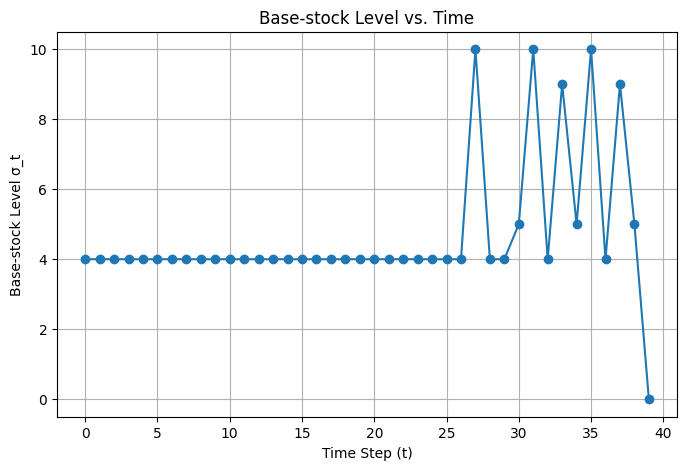

In [14]:

# ---------------------------
# Plot sigma_t vs. time
# ---------------------------
time_range = np.arange(time_steps)
plt.figure(figsize=(8, 5))
plt.plot(time_range, base_stocks, marker='o', linestyle='-')
plt.xlabel('Time Step (t)')
plt.ylabel('Base-stock Level σ_t')
plt.title('Base-stock Level vs. Time')
plt.grid(True)
plt.show()

In [15]:
class InventoryEnv:
    def __init__(self, min_val=-200, max_val=500):
        """
        min_val, max_val: the actual integer inventory levels 
                          (max_val is exclusive).
        """
        self.min_inventory = min_val
        self.max_inventory = max_val - 1  # clamp new_inventory up to max_val-1


In [16]:
def extract_policy_from_Q(Q, final_iter, T, num_states, num_actions):
    """
    Returns a 2D array 'policy' of shape (T, num_states),
    where policy[t, i] = argmin_{a} Q[i, a, final_iter, t].
    """
    policy = np.zeros((T, num_states), dtype=int)
    for t in range(T):
        for i in range(num_states):
            # Argmin over actions for cost-based Q
            best_action = np.argmin(Q[i, :, final_iter, t])
            policy[t, i] = best_action
    return policy


In [17]:
final_iter = m  # e.g., 100
policy = extract_policy_from_Q(Q, final_iter, T, num_states, num_actions)


In [18]:
import matplotlib.pyplot as plt

def simulate_and_print_and_plot_qlearning(env, policy, time_steps, 
                                          base_stock_levels=None, 
                                          initial_inventory=0):
    """
    Simulate a single episode of length 'time_steps' using the given 'policy', 
    starting at inventory = initial_inventory.
    
    If 'base_stock_levels' is not None, we will also plot them 
    for comparison with the actual inventory.
    
    We'll print a table with columns:
      Time Step | Inventory | Base Stock Threshold | Demand | Action
    Then we'll produce two plots:
      1. Inventory and base-stock threshold vs. time
      2. Order quantity and demand vs. time
    """
    current_inventory = initial_inventory
    # Convert to state index: i = current_inventory - env.min_inventory
    current_state = current_inventory - env.min_inventory
    
    times = []
    inventories = []
    thresholds = [] if base_stock_levels is not None else None
    actions_list = []
    demands_list = []
    
    print("Time Step | Inventory | Base Stock Threshold | Demand | Action")
    print("---------------------------------------------------------------")
    
    for t in range(time_steps):
        # Determine base-stock threshold at time t (if given)
        threshold_t = base_stock_levels[t] if base_stock_levels is not None else None
        
        # Sample a random demand from U(0..10)
        demand = random.randint(0, 10)
        
        # Look up the action from the policy
        action = policy[t, current_state]
        
        # Print row
        if threshold_t is not None:
            print(f"{t:9d} | {current_inventory:9d} | {threshold_t:20d} | {demand:6d} | {action:6d}")
        else:
            print(f"{t:9d} | {current_inventory:9d} | {'-':20} | {demand:6d} | {action:6d}")
        
        # Store for plotting
        times.append(t)
        inventories.append(current_inventory)
        if thresholds is not None:
            thresholds.append(threshold_t)
        actions_list.append(action)
        demands_list.append(demand)
        
        # Update inventory
        new_inventory = current_inventory + action - demand
        # clamp to [env.min_inventory, env.max_inventory]
        new_inventory = max(env.min_inventory, min(new_inventory, env.max_inventory))
        
        # Move to next state
        current_inventory = new_inventory
        current_state = current_inventory - env.min_inventory
    
    # Also append final time step to inventory trajectory for a stepped plot if desired
    times.append(time_steps)
    inventories.append(current_inventory)
    
    # -----------------------------
    # PLOTTING
    # -----------------------------
    plt.figure(figsize=(12, 10))
    
    # Subplot 1: Inventory vs. time (plus base-stock if available)
    plt.subplot(2, 1, 1)
    # For the inventory, we have 'time_steps+1' points in 'times' and 'inventories'.
    plt.plot(times, inventories, marker='o', linestyle='-', label="Inventory")
    if thresholds is not None:
        # thresholds has length = time_steps, so we plot 0..time_steps-1
        plt.plot(range(time_steps), thresholds, marker='x', linestyle='--',
                 color='red', label="Base Stock Threshold")
    plt.xlabel("Time Step")
    plt.ylabel("Inventory / Base Stock")
    plt.title("Inventory and Base Stock Threshold Over Time")
    plt.grid(True)
    plt.legend()
    
    # Subplot 2: Order Quantity (Action) and Demand
    plt.subplot(2, 1, 2)
    plt.step(range(time_steps), actions_list, where='post', label="Order Quantity", color='blue')
    plt.scatter(range(time_steps), demands_list, label="Demand", color='green')
    plt.xlabel("Time Step")
    plt.ylabel("Action / Demand")
    plt.title("Order Quantity and Demand Over Time")
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Time Step | Inventory | Base Stock Threshold | Demand | Action
---------------------------------------------------------------
        0 |         0 |                    4 |      7 |      4
        1 |        -3 |                    4 |     10 |      4
        2 |        -9 |                    4 |      8 |     10
        3 |        -7 |                    4 |      3 |     11
        4 |         1 |                    4 |      6 |      2
        5 |        -3 |                    4 |      0 |      4
        6 |         1 |                    4 |      9 |      2
        7 |        -6 |                    4 |      1 |      9
        8 |         2 |                    4 |      4 |      1
        9 |        -1 |                    4 |      9 |      5
       10 |        -5 |                    4 |      8 |      5
       11 |        -8 |                    4 |      5 |     12
       12 |        -1 |                    4 |      1 |      5
       13 |         3 |                    4 |      7 

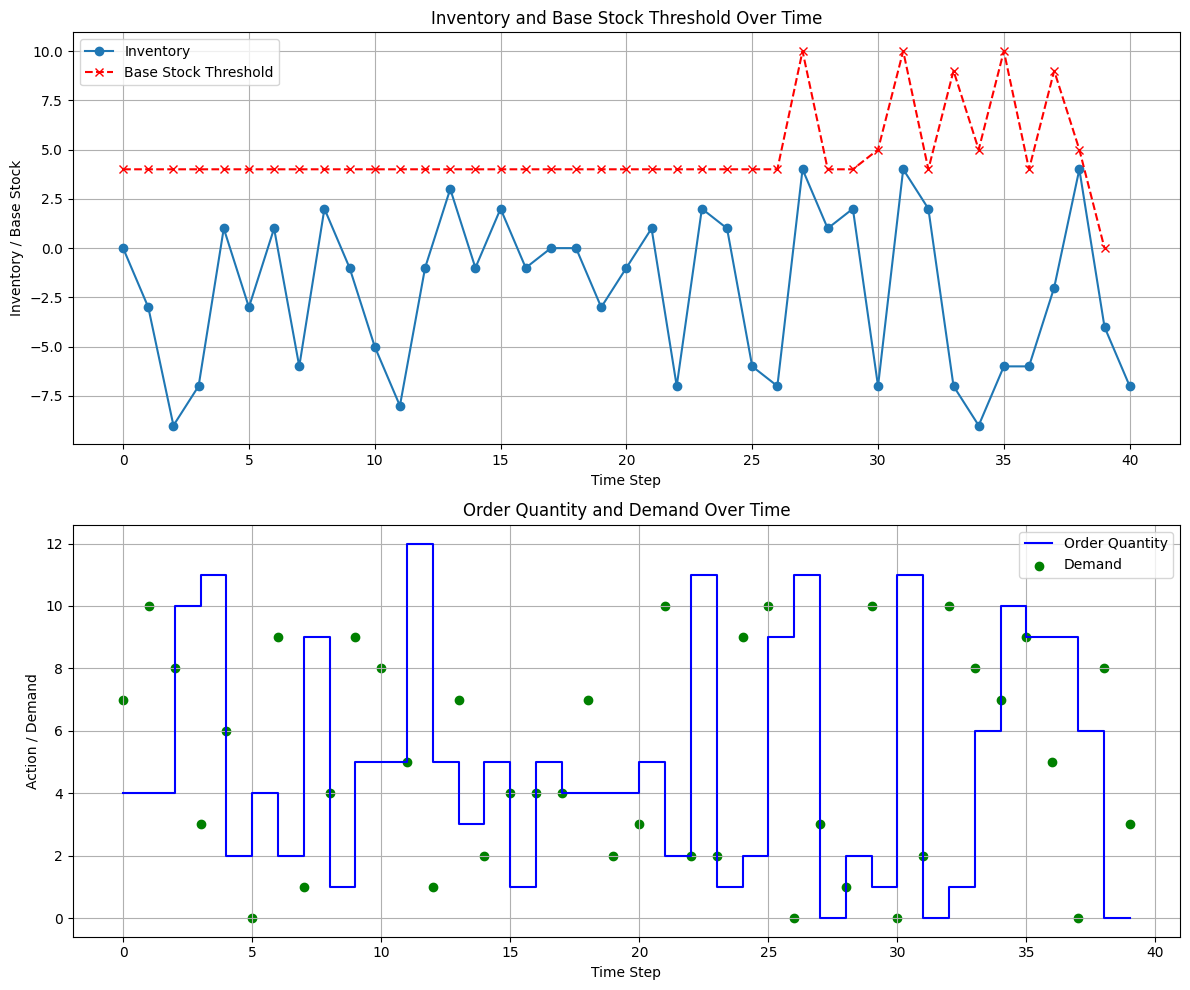

In [22]:
# 1) Suppose we've just finished our Q-learning update:
#    Q[i, a, iteration, t] is populated.

# 2) Extract policy from final iteration:
final_iter = m  # e.g., 100
policy = extract_policy_from_Q(Q, final_iter, T, num_states, num_actions)

# 3) Suppose we also computed base_stock_levels = [sigma_0, ..., sigma_{T-1}].
#    If not, set base_stock_levels=None.

# 4) Create an environment
env = InventoryEnv(min_val, max_val)

# 5) Simulate and plot:
simulate_and_print_and_plot_qlearning(
    env=env,
    policy=policy,
    time_steps=T,
    base_stock_levels=base_stocks,  # or None
    initial_inventory=0  # or some other starting inventory
)


# Instantaneous and Cumulative regret

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from algorithms.value_iteration import ValueIteration

# Parameters
T = 40  # Finite horizon
a_cost, b_cost = 2, 5  # Holding and backlog cost rates
p = 2  # Procurement cost per unit
U = 10  # Maximum procurement
discount = 1.0  # No discounting
min_inventory, max_inventory = -200, 500
m = 100

In [33]:
def sample_demand():
    return np.random.randint(0, 11)

def holding_cost(x):
    return a * x if x >= 0 else -b * x

In [34]:
suboptimal_policy = extract_policy_from_Q(Q, m, T, num_states, num_actions)

In [52]:
class ValueIteration:
    def __init__(self, num_states, actions, rewards, time_steps, discount=1.0, min_inventory=-500, max_inventory=200):
        self.num_states = num_states  # Number of states
        self.actions = actions        # Number of possible actions
        self.rewards = rewards        # Reward matrix (num_states x actions)
        self.ts = time_steps          # Number of time steps in the finite horizon
        self.discount = discount
        self.min_inventory = min_inventory
        self.max_inventory = max_inventory

        # Initialize value function array and policy array.
        # V has shape (time_steps+1, num_states), policy has shape (time_steps, num_states)
        self.V = np.zeros((self.ts + 1, self.num_states))
        self.policy = np.zeros((self.ts, self.num_states), dtype=int)

    def value_iteration(self):
        # Iterate backwards from the second-to-last time step down to time 0.
        for t in range(self.ts - 1, -1, -1):
            for s in range(self.num_states):
                q_vals = np.zeros(self.actions)
                for a in range(self.actions):
                    # Sample a random demand (discrete uniform between 0 and 10)
                    w = np.random.randint(0, 11)
                    
                    # Current inventory level corresponding to state index s.
                    current_inventory = s + self.min_inventory
                    
                    # Compute new inventory level after ordering a and subtracting demand w.
                    new_inventory = current_inventory + a - w
                    
                    # Clip new_inventory to lie within the allowed bounds.
                    new_inventory = max(self.min_inventory, min(new_inventory, self.max_inventory))
                    
                    # Convert new_inventory back to an index and clamp within range.
                    new_index = min(self.num_states - 1, max(0, new_inventory - self.min_inventory))
                    
                    # Compute Q-value: immediate reward plus discounted future value.
                    q_vals[a] = self.rewards[s, a] + self.discount * self.V[t + 1, new_index]
                
                # For a cost minimization problem, we choose the action with the smallest Q-value.
                self.V[t, s] = np.min(q_vals)
                self.policy[t, s] = np.argmin(q_vals)
        
        return self.policy, self.V


In [53]:
rewards = np.zeros((num_states, num_actions))
for i in range(num_states):
    x = i + min_inventory  # Convert index to actual inventory level
    for a in range(num_actions):
        rewards[i, a] = holding_cost(x) + price * a


In [54]:
w_values = np.arange(0, 11)  # Demand values 0, 1, ..., 10
demand_probs = np.ones(len(w_values)) / len(w_values)  # Uniform probability for each demand value

# Initialize TPM: dimensions (num_states x actions x num_states)
tpm = np.zeros((num_states, num_actions, num_states))
for i in range(num_states):
    x = i + min_inventory  # Current inventory level
    for act in range(num_actions):
        for w, p_w in zip(w_values, demand_probs):
            new_inventory = x + act - w
            # Clip new_inventory to be within [min_inventory, max_inventory]
            new_inventory = max(min_inventory, min(new_inventory, max_inventory))
            j = min(num_states - 1, new_inventory - min_inventory)  # Ensure valid index
            tpm[i, act, j] += p_w


In [55]:
vi = ValueIteration(num_states, num_actions, rewards, time_steps, discount, min_inventory, max_inventory)
policy, V = vi.value_iteration()


In [56]:
optimal_policy = policy
print("Optimal Policy: ", optimal_policy)
print("Suboptimal Policy: ", suboptimal_policy)

Optimal Policy:  [[17 17 18 ...  0  0  0]
 [17 18 17 ...  0  0  0]
 [19 19 18 ...  0  0  0]
 ...
 [17 19 17 ...  0  0  0]
 [15 17 16 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Suboptimal Policy:  [[18 18 19 ...  0  0  0]
 [19 19 15 ...  0  0  0]
 [16 13 18 ...  0  0  0]
 ...
 [19 18 18 ...  0  0  0]
 [18 13 19 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [62]:
def evaluate_finite_horizon_policy(policy, rewards, transition_probs, time_steps, discount=1.0):
    """
    Evaluates a given policy over a finite horizon.

    Args:
        policy (ndarray): Policy matrix of shape (time_steps, num_states).
        rewards (ndarray): Reward matrix of shape (num_states, num_actions).
        transition_probs (ndarray): Transition probability matrix (num_states, num_actions, num_states).
        time_steps (int): Number of time steps in the finite horizon.
        discount (float): Discount factor.

    Returns:
        V (ndarray): Value function matrix of shape (time_steps+1, num_states).
    """
    num_states = policy.shape[1]  # Extract number of states

    # Initialize value function matrix (time_steps+1 to handle terminal condition)
    V = np.zeros((time_steps + 1, num_states))

    # Iterate backward from the last time step to time 0
    for t in range(time_steps - 1, -1, -1):
        for s in range(num_states):
            a = policy[t, s]  # Action chosen by policy at (t, s)
            V[t, s] = rewards[s, a] + discount * np.sum(transition_probs[s, a] * V[t + 1])

    return V

In [65]:
best_val = evaluate_finite_horizon_policy(optimal_policy, rewards, tpm, T)
suboptimal_val = evaluate_finite_horizon_policy(suboptimal_policy, rewards, tpm, T)

In [68]:
print("Value with optimal policy", best_val)
print("Value with suboptimal policy", suboptimal_val)

Value with optimal policy [[9762.16350573 9697.12488164 9543.22109002 ...    0.
     0.            0.        ]
 [9774.60444425 9616.67773385 9609.67773385 ...    0.
     0.            0.        ]
 [9577.44557059 9480.02861279 9473.02861279 ...    0.
     0.            0.        ]
 ...
 [1980.         1964.         1957.         ...    0.
     0.            0.        ]
 [1000.          995.          990.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
Value with suboptimal policy [[9741.94278743 9668.02510379 9526.37811344 ...    0.
     0.            0.        ]
 [9530.86498035 9439.37939776 9665.91432536 ...    0.
     0.            0.        ]
 [9818.73498329 9955.58155175 9471.10276695 ...    0.
     0.            0.        ]
 ...
 [1971.         1976.         1948.         ...    0.
     0.            0.        ]
 [1000.          995.          990.         ...    0.
     0.            0.        ]

In [71]:
def compute_regret(V_opt, V_q):
    """
    Computes instantaneous and cumulative regret.

    Args:
        V_opt (ndarray): Optimal value function of shape (time_steps+1, num_states).
        V_q (ndarray): Q-learning value function of shape (time_steps+1, num_states).

    Returns:
        instantaneous_regret (ndarray): Instantaneous regret for each time step.
        cumulative_regret (ndarray): Cumulative regret for each time step.
    """
    # Compute instantaneous regret (average over all states)
    instantaneous_regret = np.mean(V_opt - V_q, axis=1)

    # Compute cumulative regret over time
    cumulative_regret = np.cumsum(instantaneous_regret)

    return instantaneous_regret, cumulative_regret

def plot_regret(instantaneous_regret, cumulative_regret):
    """
    Plots instantaneous and cumulative regret.

    Args:
        instantaneous_regret (ndarray): Instantaneous regret for each time step.
        cumulative_regret (ndarray): Cumulative regret for each time step.
    """
    time_steps = len(instantaneous_regret)

    plt.figure(figsize=(12, 5))

    # Plot Instantaneous Regret
    plt.subplot(1, 2, 1)
    plt.plot(range(time_steps), instantaneous_regret, label="Instantaneous Regret", color='b')
    plt.xlabel("Time Steps")
    plt.ylabel("Regret")
    plt.title("Instantaneous Regret Over Time")
    plt.legend()
    plt.grid()

    # Plot Cumulative Regret
    plt.subplot(1, 2, 2)
    plt.plot(range(time_steps), cumulative_regret, label="Cumulative Regret", color='r')
    plt.xlabel("Time Steps")
    plt.ylabel("Regret")
    plt.title("Cumulative Regret Over Time")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [72]:
inst_reg, cum_reg = compute_regret(best_val, suboptimal_val)

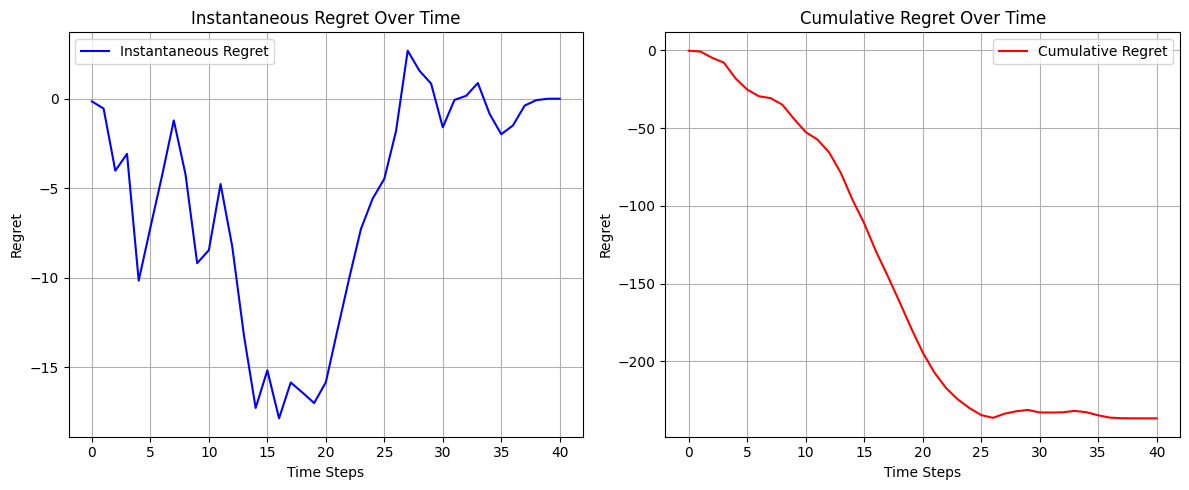

In [73]:
plot_regret(inst_reg, cum_reg)